# Exploratory Data Analysis on NYC TRIP DURATION - Simritha R
* **

**The goal of EDA is to leverage visualization tools, summary tables, and hypothesis testing to:**

* Provide summary level insight into a dataset.
* Uncover underlying patterns and structures in you data.
* Identify outliers, missing data and other data-related issues.
* Relate the available data to the business opportunity.

**Dataset:**

* This is a data set which contains all the information about taxi trips occurring between 2016-01-01 and 2016-06-30 of New York City. 
* Business scenario here is that we are expected predict the total duration of the taxi trip in NYC to maximize the effieciency of the taxi system.

# Steps of the EDA Process:

* Data Preparation
* Variable Identification and Typecasting
* Missing Values
* Descriptive Analysis of Target Variable
* Univariate Analysis and Visualization
* Bivariate Analysis and Visualization
* Correlation Heatmap
* Summary and Conclusion


## 1. Data Preparation

Load the file using Pandas

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('C:/Users/Sivam/Downloads/nyc_taxi_trip_duration.CSV')

**Structure of the file**

In [3]:
# Finding out the shape of the data using "shape" variable: Output (rows, columns)
data.shape

(729322, 11)

In [4]:
# Printing all the columns present in data
data.columns

Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration'],
      dtype='object')

* The file has 729322 records present in it with 11 columns

## 2. Variable Identification and Typecasting

In [5]:
# A closer look at the data types present in the data
data.dtypes

id                     object
vendor_id               int64
pickup_datetime        object
dropoff_datetime       object
passenger_count         int64
pickup_longitude      float64
pickup_latitude       float64
dropoff_longitude     float64
dropoff_latitude      float64
store_and_fwd_flag     object
trip_duration           int64
dtype: object

### Data Description:
 - **id** - a unique identifier for each trip
 - **vendor_id** - a code indicating the provider associated with the trip record
 - **pickup_datetime** - date and time when the meter was engaged
 - **dropoff_datetime** - date and time when the meter was disengaged
 - **passenger_count** - the number of passengers in the vehicle (driver entered value)
 - **pickup_longitude** - the longitude where the meter was engaged
 - **pickup_latitude** - the latitude where the meter was engaged
 - **dropoff_longitude** - the longitude where the meter was disengaged
 - **dropoff_latitude** - the latitude where the meter was disengaged
 - **store_and_fwd_flag** - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server (Y=store and forward; N=not a store and forward trip)
 - **trip_duration(target)** - duration of the trip in seconds

### Integer Data Type 

In [6]:
# Identifying variables with integer datatype
data.dtypes[data.dtypes == 'int64']

vendor_id          int64
passenger_count    int64
trip_duration      int64
dtype: object

In [7]:
data['passenger_count'] = data['passenger_count'].astype('category')
data['vendor_id'] = data['vendor_id'].astype('category')

**Summary**
* trip_duration is expressed in seconds.
* passenger_count is supposed to be an ordinal category, should be converted to category.
* vendor_id again represents different vendors, therefore it should be convereted to category.

### Float Data Type 

In [8]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'float64']

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
dtype: object

**Summary**
* the variables like pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude are best represented by the float variables.

### datetime Data Type

In [9]:
# Identifying variables with float datatype
data.dtypes[data.dtypes == 'object']

id                    object
pickup_datetime       object
dropoff_datetime      object
store_and_fwd_flag    object
dtype: object

In [10]:
# Typecasting strings to datetime features
data['pickup_datetime'] = pd.to_datetime(data.pickup_datetime)
data['dropoff_datetime'] = pd.to_datetime(data.dropoff_datetime)

**Summary**
* the variables like pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude are best represented by the float variables.

## 3. Missing Values

It is during the Exploratory Data Analysis (EDA) process that data integrity issues are identified sometimes. After extracting data it is important to include checks for quality assurance even on the first pass through the project workflow. Quality assurance step must implement checks for duplicity and missing values.

In [11]:
# to find the missing values 
data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

**Summary**
* There are no missing values in the dataset.

## 4. Descriptive Analysis of Target Variable

In [12]:
data.trip_duration[data.trip_duration == 1939736]

21813    1939736
Name: trip_duration, dtype: int64

In [13]:
# Description on trip_duration
data['trip_duration'].describe()

count    7.293220e+05
mean     9.522291e+02
std      3.864626e+03
min      1.000000e+00
25%      3.970000e+02
50%      6.630000e+02
75%      1.075000e+03
max      1.939736e+06
Name: trip_duration, dtype: float64

<AxesSubplot:xlabel='trip_duration', ylabel='Count'>

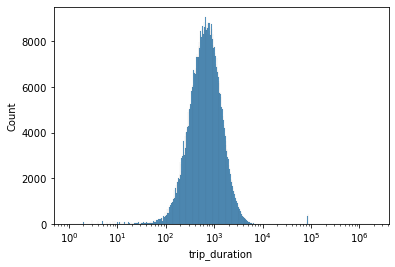

In [14]:
sns.histplot(data.trip_duration, log_scale=True)

**Summary**
* Using the describe() we can see that the longest trip was for 539 hours.
* From the histogram its evident that the duration follows a normal distribution and has its peak at 16 mins.
* There are a few outliers at the tail of the distribution


##  5. Univariate Analysis and Visualization

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable.

### Pickup Time

<AxesSubplot:xlabel='pickup_datetime'>

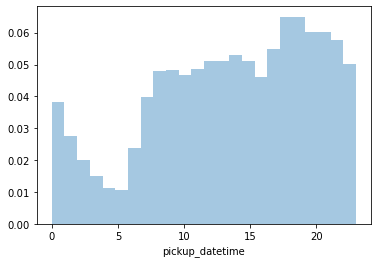

In [15]:
sns.distplot(data.pickup_datetime.dt.hour, bins=24, kde=False, norm_hist=True)

**Summary**
* Here from the column datetime the hour part is extracted.
* The pickup time is high in the evening but its surprising to see that the morning hours are a bit low.
* The pick up time is high around  6pm - 8pm.

<AxesSubplot:xlabel='pickup_datetime'>

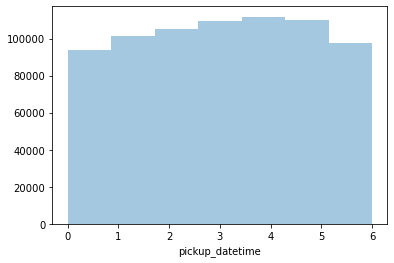

In [16]:
sns.distplot(data.pickup_datetime.dt.dayofweek, bins=7, kde=False)

**Summary**
* Here also the day of week has been extracted from the column datetime.
* The pick up time is quite the same throughtout the week and slightly higher on Thursday.
* The weekdays are when people are most busy so that explains that the pickup time is higher in weekdays rather than weekends.


### Passenger count, Vendor  id and Stop and Store Flag

In [17]:
# Custom function for visualisation of Categorical Variables
def UVA_category(data, var_group):
    
  # setting figure_size
  size = len(var_group)
  plt.figure(figsize = (7*size,5), dpi = 100)

  # for every variable
  for j,i in enumerate(var_group):
    norm_count = data[i].value_counts(normalize = True)
    n_uni = data[i].nunique()

  #Plotting the variable with every information
    plt.subplot(1,size,j+1)
    sns.barplot(norm_count, norm_count.index , order = norm_count.index)
    plt.xlabel('fraction/percent', fontsize = 20)
    plt.ylabel('{}'.format(i), fontsize = 20)
    plt.title('n_uniques = {} \n value counts \n {};'.format(n_uni,norm_count))

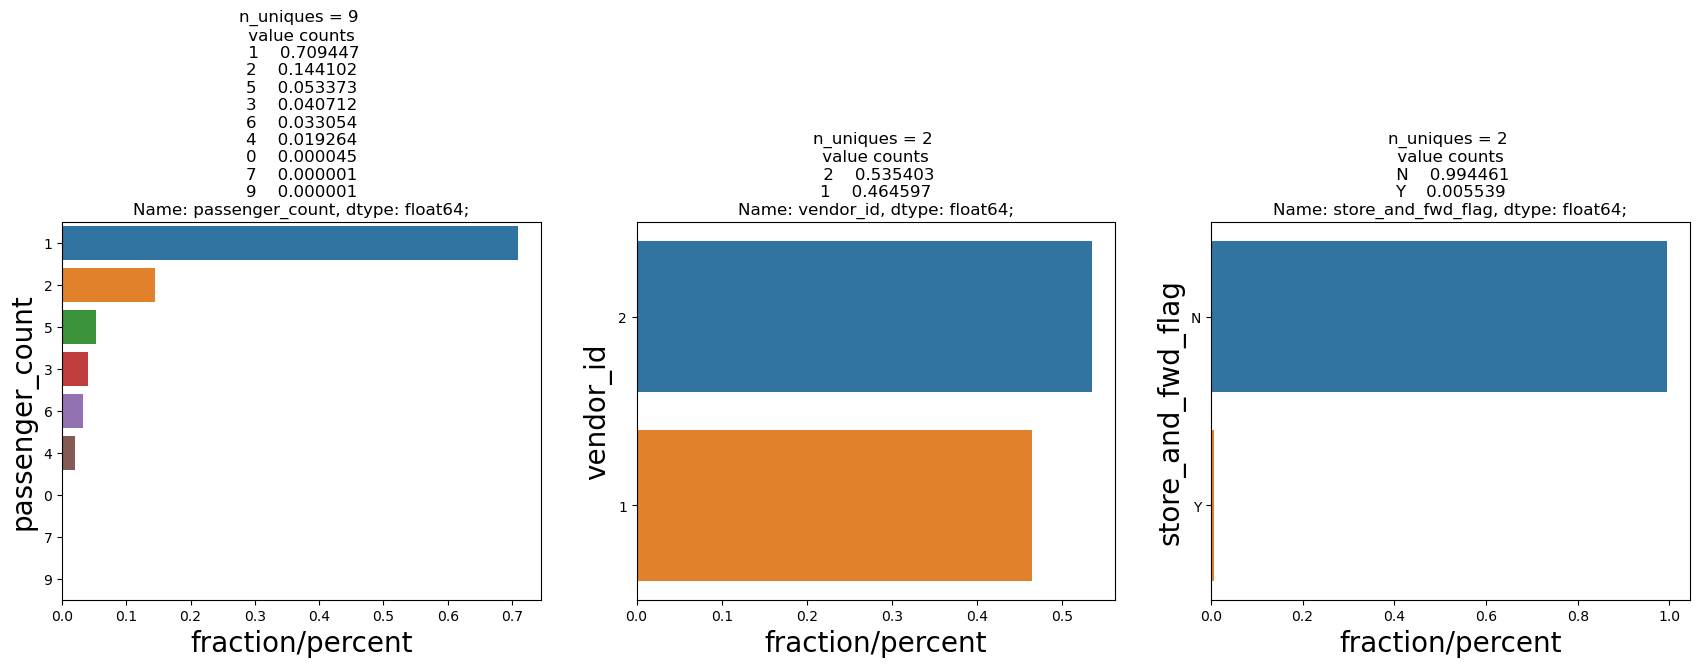

In [18]:
UVA_category(data, ['passenger_count', 'vendor_id','store_and_fwd_flag'])

**Summary**
* Most of the rides seems to have less than 2 passengers.
* Vendor 2 has had more rides than Vendor 2.
* No vehicle has held and recorded the data.

### Pickup and Drop Longitude and Latitude

<AxesSubplot:xlabel='pickup_longitude', ylabel='pickup_latitude'>

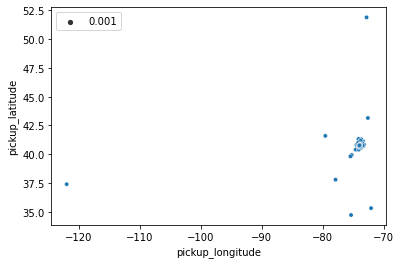

In [19]:
# choose 50% of data
sample_data = data.sample(int(0.5 * len(data)))
sns.scatterplot(x=sample_data.pickup_longitude, y=sample_data.pickup_latitude, size=0.001)

<AxesSubplot:xlabel='dropoff_longitude', ylabel='dropoff_latitude'>

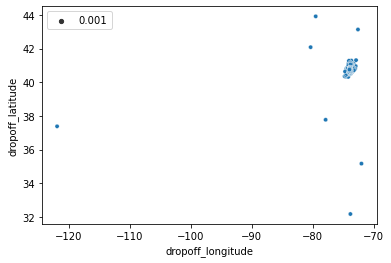

In [20]:
sns.scatterplot(x=sample_data.dropoff_longitude, y=sample_data.dropoff_latitude, size=0.001)

**Summary**
* The Start and Drop locations has no inconsistency in data and have only little outliers in them.

## 6. Bivariate Analysis and Visualization

### Vendor Id vs Trip Duration

In [21]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sampled Z-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import norm
  ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
  z = (X1 - X2)/ovr_sigma
  pval = 2*(1 - norm.cdf(abs(z)))
  return pval

In [22]:
def TwoSampT(X1, X2, sd1, sd2, n1, n2):
  '''
  takes mean, standard deviation, and number of observations and returns p-value calculated for 2-sample T-Test
  '''
  from numpy import sqrt, abs, round
  from scipy.stats import t as t_dist
  ovr_sd = sqrt(sd1**2/n1 + sd2**2/n2)
  t = (X1 - X2)/ovr_sd
  df = n1+n2-2
  pval = 2*(1 - t_dist.cdf(abs(t),df))
  return pval

In [23]:
def Bivariate_cont_cat(data, cont, cat, category):
  #creating 2 samples
  x1 = data[cont][data[cat]==category][:]
  x2 = data[cont][~(data[cat]==category)][:]
  
  #calculating descriptives
  n1, n2 = x1.shape[0], x2.shape[0]
  m1, m2 = x1.mean(), x2.mean()
  std1, std2 = x1.std(), x2.mean()
  
  #calculating p-values
  t_p_val = TwoSampT(m1, m2, std1, std2, n1, n2)
  z_p_val = TwoSampZ(m1, m2, std1, std2, n1, n2)

  #table
  table = pd.pivot_table(data=data, values=cont, columns=cat, aggfunc = np.mean)

  #plotting
  plt.figure(figsize = (15,6), dpi=140)
  
  #barplot
  plt.subplot(1,2,1)
  sns.barplot([str(category),'2'.format(category)], [m1, m2])
  plt.ylabel('mean {}'.format(cont))
  plt.xlabel(cat)
  plt.title('t-test p-value = {} \n z-test p-value = {}\n {}'.format(t_p_val,
                                                                z_p_val,
                                                                table))

  # boxplot
  plt.subplot(1,2,2)
  sns.boxplot(x=cat, y=cont, data=data)
  plt.title('categorical boxplot')
  

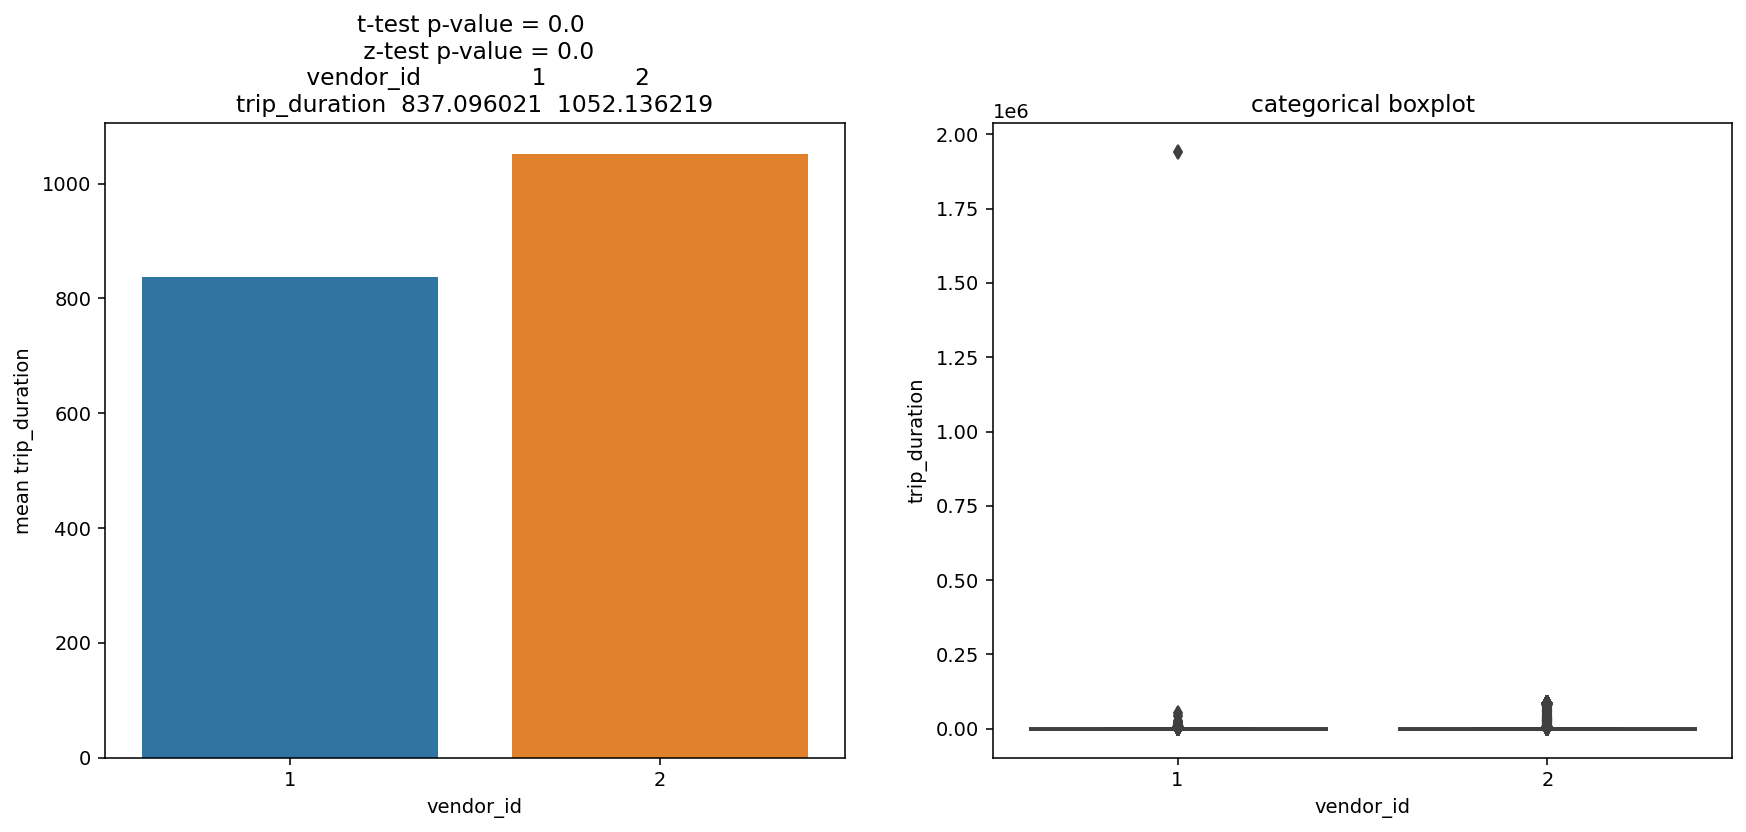

In [24]:
Bivariate_cont_cat(data, 'trip_duration', 'vendor_id', 1)

**Summary**
* Vendor 2 has an higher average value than vendor 1.

### Vendor Id vs Trip Duration

<AxesSubplot:xlabel='passenger_count', ylabel='trip_duration'>

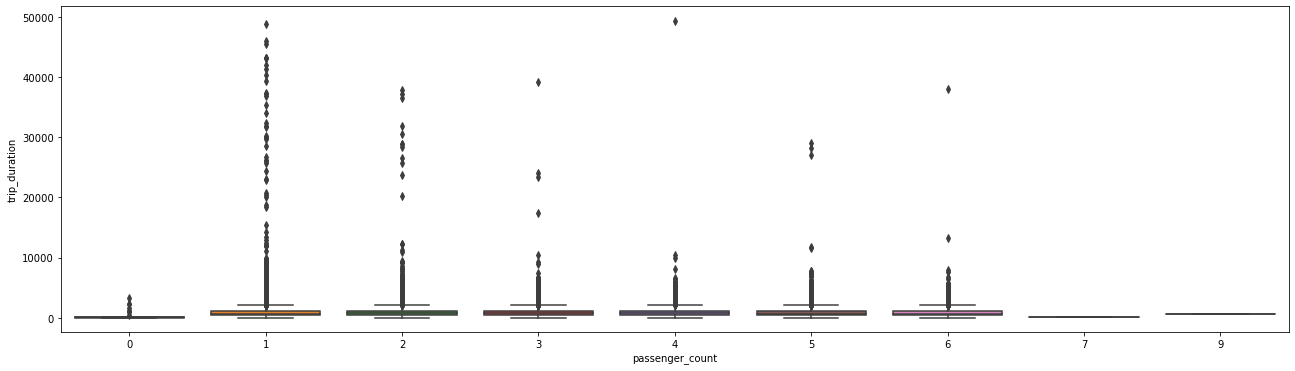

In [32]:
# choosing a sample of trips with less than 50000 seconds to avoid outliers
sample1 = data[data['trip_duration'] < 50000]
plt.figure(figsize=(22, 6))
sns.boxplot(x="passenger_count", y="trip_duration",data=sample1)

**Summary**
* As the number of passengers seem to increase there is a decrease in the number of outliers.
* There isnt a lot of trips with the passenger count above 7

### Vendor Id vs Passenger count

<AxesSubplot:xlabel='passenger_count'>

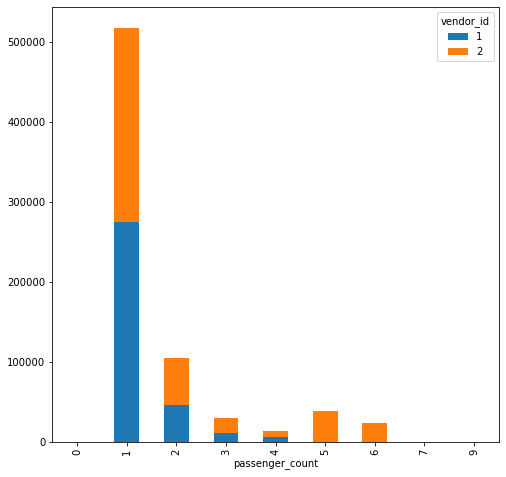

In [26]:
# using a crosstab to analyse the categorical varriables
passenger_vendor_table = pd.crosstab(index=data['passenger_count'],columns=data['vendor_id'])
passenger_vendor_table.plot(kind="bar",figsize=(8,8), stacked=True)

**Summary**
* Vendor 2 has a higher number of trips with higher passenger count.


### Vendor Id vs Day of Week

<AxesSubplot:xlabel='pickup_datetime'>

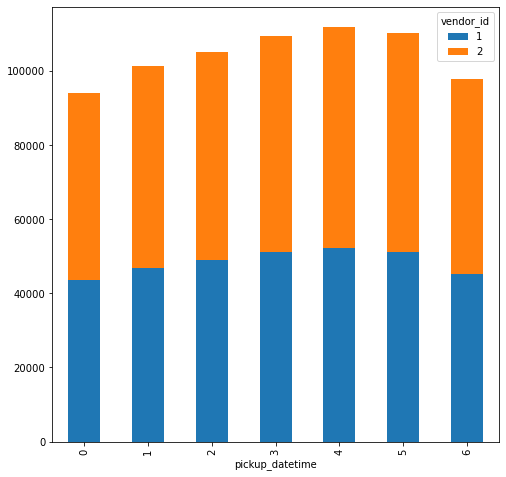

In [34]:
# using a crosstab to analyse the categorical varriables
weekday_vendor_table= pd.crosstab(index=data.pickup_datetime.dt.dayofweek,columns=data['vendor_id'])
weekday_vendor_table.plot(kind="bar",figsize=(8,8), stacked=True)

### Vendor Id vs Hour

<AxesSubplot:xlabel='pickup_datetime'>

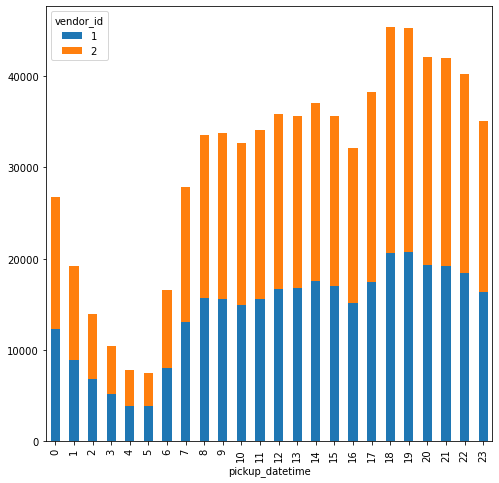

In [28]:
hour_vendor_table= pd.crosstab(index=data.pickup_datetime.dt.hour,columns=data['vendor_id'])
hour_vendor_table.plot(kind="bar",figsize=(8,8), stacked=True)

**Summary**
* As expected the plots aren't any different.

## 7. Correlation Heatmap

A correlation heatmap is a heatmap that shows a 2D correlation matrix between two discrete dimensions, using colored cells to represent data from usually a monochromatic scale. 
The values of the first dimension appear as the rows of the table while of the second dimension as a column.

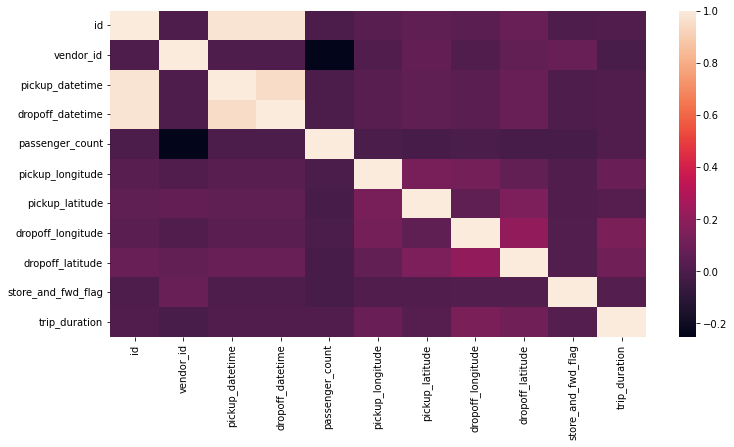

In [29]:
plt.figure(figsize=(12, 6))
corr = data.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

**Summary**
* The drop off longitude and drop off latitude has a high coorelation between them.

## 8. Summary and Conclusion

* The Trip duration follows a normal distribution and has its peak at 16 mins.
* There are a few outliers at the tail of the distribution and some rides are less than 20 seconds.
* The pickup time is high in the evening but its surprising to see that the morning hours are a bit low.
* The pick up time is high around 6pm - 8pm.
* The pick up time is quite the same throughtout the week and slightly higher on Thursday.
* The weekdays are when people are most busy so that explains that the pickup time is higher in weekdays rather than weekends.
* Most of the rides seems to have less than 2 passengers.
* Vendor 2 has had more rides than Vendor 2.
* No vehicle has held and recorded the trip data.
* The Start and Drop locations have no inconsistency in data and have only little outliers in them.
* As the number of passengers seem to increase there is a decrease in the number of outliers.
* There isnt a lot of trips with the passenger count above 7
* Vendor 2 has a higher number of trips with higher passenger count.
* The drop off longitude and drop off latitude has a high coorelation between them.

## Experience

* I looked through all the types of plots and graphs online and studied their function.
* I had some difficulties in finding the properties of each plot.
* But as I started dividing the project into parts I overcame the trouble.
* I found out that having headings and a summary part for each section very helful.